## Importing libraries and Data

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import IPython.display as ipd
import librosa
import librosa.display

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
from tqdm import tqdm

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [51]:
from tensorflow.keras.optimizers import schedules, Adam

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

In [9]:
datapath = 'UrbanSound8K'

## EDA

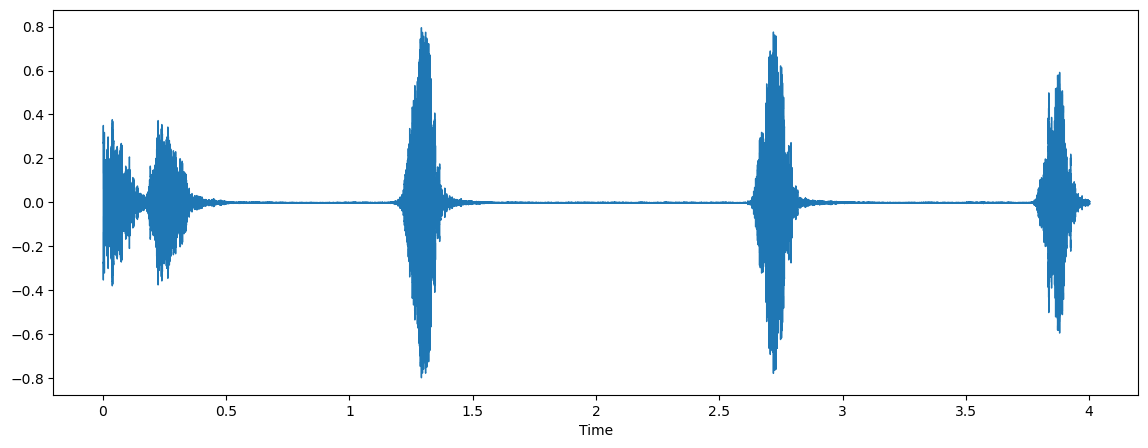

In [10]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(datapath+'/audio/fold1/101415-3-0-8.wav')
librosa.display.waveshow(data,sr=sample_rate)

In [11]:
ipd.Audio(datapath+'/audio/fold1/101415-3-0-8.wav')

In [12]:
data

array([ 0.23264292,  0.3517679 ,  0.2967721 , ..., -0.002873  ,
       -0.00120905, -0.00118477], dtype=float32)

In [13]:
sample_rate

22050

In [14]:
df = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')

In [15]:
df.head(5)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


### Checking imbalanced dataset

In [16]:
df['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

## Extracting Features

In [17]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [18]:
mfccs

array([[-1.33843689e+02, -1.61876892e+02, -2.46689758e+02, ...,
        -2.86435455e+02, -3.39915588e+02, -3.87299683e+02],
       [ 1.27509995e+02,  1.38881104e+02,  1.29488937e+02, ...,
         1.75267212e+02,  1.45793228e+02,  1.22556091e+02],
       [-1.50611496e+01, -1.64899006e+01, -1.27385569e+01, ...,
         2.42717177e-01,  2.07959414e+00,  7.16894865e+00],
       ...,
       [ 1.67126274e+00,  1.79348922e+00,  3.12717104e+00, ...,
        -1.12405133e+00, -4.16704774e-01, -1.17662644e+00],
       [ 9.89658415e-01,  2.49914932e+00,  1.75631750e+00, ...,
         1.79284072e+00, -9.92133737e-01, -2.71845698e+00],
       [ 2.48936248e+00,  5.60033751e+00,  8.95464516e+00, ...,
        -9.37529564e+00, -5.32250690e+00, -9.55527067e-01]], dtype=float32)

In [19]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [74]:
from tqdm import tqdm
datapath = 'UrbanSound8K/audio/'
extracted_features=[]

In [75]:
for index_num,row in tqdm(df.iterrows()):
    file_name = os.path.join(os.path.abspath(datapath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

0it [00:00, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3it [00:00, 21.74it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

6it [00:00, 18.16it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

8it [00:00, 17.26it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

11it [00:00, 20.92it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

15it [00:00, 23.87it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

18it [00:00, 20.63it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

21it [00:01, 18.95it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

23it [00:01, 18.13it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

25it [00:01, 17.63it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

27it [00:01, 17.36it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

29it [00:01, 17.17it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

31it [00:01, 16.98it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

33it [00:01, 16.81it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

35it [00:01, 16.65it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

37it [00:02, 16.37it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

39it [00:02, 16.30it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

41it [00:02, 16.21it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

43it [00:02, 15.37it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

45it [00:02, 15.41it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

47it [00:02, 15.51it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

49it [00:02, 15.47it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

51it [00:02, 15.48it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

53it [00:03, 15.63it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

55it [00:03, 15.74it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

57it [00:03, 15.52it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

59it [00:03, 15.27it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

61it [00:03, 15.03it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

63it [00:03, 15.00it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

65it [00:03, 14.91it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

67it [00:04, 14.95it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

69it [00:04, 14.87it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

71it [00:04, 14.66it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

73it [00:04, 14.71it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

75it [00:04, 14.67it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

77it [00:04, 14.65it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

79it [00:04, 14.76it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

81it [00:04, 14.75it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

83it [00:05, 14.59it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

85it [00:05, 14.49it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

87it [00:05, 14.18it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

89it [00:05, 14.21it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

91it [00:05, 14.30it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

93it [00:05, 14.26it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

95it [00:05, 14.74it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

97it [00:06, 15.24it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

99it [00:06, 15.53it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

101it [00:06, 16.24it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

105it [00:06, 21.87it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

108it [00:06, 22.04it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

111it [00:06, 19.55it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

114it [00:06, 18.40it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

116it [00:07, 17.86it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

118it [00:07, 17.51it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

120it [00:07, 17.13it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

122it [00:07, 16.92it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

124it [00:07, 16.69it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

126it [00:07, 16.57it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

128it [00:07, 16.48it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

130it [00:07, 16.45it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

132it [00:08, 16.40it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

134it [00:08, 16.47it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

136it [00:08, 16.41it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

138it [00:08, 16.28it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

140it [00:08, 16.20it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

142it [00:08, 16.10it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

144it [00:08, 16.11it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

146it [00:08, 16.11it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

148it [00:09, 16.16it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

150it [00:09, 16.11it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

152it [00:09, 16.19it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

154it [00:09, 16.25it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

156it [00:09, 15.54it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

158it [00:09, 15.78it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

160it [00:09, 15.92it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

162it [00:09, 16.14it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

164it [00:10, 16.25it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

166it [00:10, 16.14it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

168it [00:10, 16.02it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

170it [00:10, 16.05it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

172it [00:10, 15.86it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

174it [00:10, 15.57it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

176it [00:10, 14.99it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

178it [00:10, 14.87it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

180it [00:11, 14.16it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

183it [00:11, 15.44it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

185it [00:11, 15.26it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

187it [00:11, 14.98it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

189it [00:11, 14.93it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

191it [00:11, 14.74it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

193it [00:11, 14.48it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

197it [00:12, 18.71it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

199it [00:12, 18.00it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

201it [00:12, 17.52it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

204it [00:12, 18.25it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

206it [00:12, 17.66it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

208it [00:12, 17.19it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

210it [00:12, 17.00it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

212it [00:12, 16.82it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

214it [00:13, 16.70it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

217it [00:13, 18.71it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

219it [00:13, 17.28it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

219it [00:13, 16.31it/s]


KeyboardInterrupt: 

In [26]:
len(extracted_features)

8732

In [29]:
extracted_features[8731]

[array([-315.6028    ,   94.854805  ,  -37.22234   ,   46.778263  ,
          -6.728693  ,   10.012548  ,   -1.6075529 ,   18.51134   ,
         -11.9006195 ,    7.5940356 ,   -7.8546596 ,   11.362425  ,
         -15.617317  ,    3.3019907 ,  -11.958162  ,    6.353489  ,
          -5.5870256 ,   20.78539   ,   -0.46922812,    6.0436325 ,
         -11.619548  ,    2.8686748 ,  -10.176432  ,    8.332485  ,
           1.776561  ,    2.5638974 ,  -14.761059  ,    1.1465563 ,
           3.7835658 ,    3.1094651 ,  -12.185813  ,   -3.0522912 ,
           3.728414  ,    8.962752  ,    0.93064487,    3.18008   ,
           2.485049  ,    0.6138646 ,  -11.449189  ,   -6.0105853 ],
       dtype=float32),
 'car_horn']

In [21]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [121]:
extracted_features_df.to_csv('saved_models/extraxted_audio_features.csv')

### Splitting independent features

In [85]:
X=np.array(extracted_features_df['feature'].tolist())

In [86]:
X.shape,y.shape

((8732, 40), (8732, 9))

In [87]:
X

array([[-2.1735526e+02,  7.0223381e+01, -1.3038527e+02, ...,
        -1.6930529e+00, -6.1698371e-01,  3.8600543e-01],
       [-4.2409818e+02,  1.0934077e+02, -5.2919525e+01, ...,
         5.3489321e-01, -5.4468727e-01,  4.4632098e-01],
       [-4.5879114e+02,  1.2138419e+02, -4.6520657e+01, ...,
         2.0768483e+00,  1.6962963e+00, -9.6140963e-01],
       ...,
       [-3.0388824e+02,  1.1135945e+02, -4.5941563e+01, ...,
        -3.0292380e+00,  2.7170298e+00,  7.6197419e+00],
       [-3.4411008e+02,  1.2545021e+02, -5.4903442e+01, ...,
        -7.9082441e+00, -1.6414586e+00,  5.6668439e+00],
       [-3.1560281e+02,  9.4854805e+01, -3.7222340e+01, ...,
         6.1386460e-01, -1.1449189e+01, -6.0105853e+00]], dtype=float32)

### Splitting Target variable

In [106]:
y=np.array(extracted_features_df['class'].tolist())

In [107]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [178]:
# Get the encoding mapping
encoding_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))

print(encoding_mapping)

{'air_conditioner': 0, 'car_horn': 1, 'children_playing': 2, 'dog_bark': 3, 'drilling': 4, 'engine_idling': 5, 'gun_shot': 6, 'jackhammer': 7, 'siren': 8, 'street_music': 9}


In [108]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

### Train Test Split

In [109]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [110]:
x_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665260e+00, -1.36902368e+00,  2.75575495e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305033e+00, -5.27745247e+00, -1.55697143e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920441e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641389e-01,  7.33490825e-01,  7.11009085e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811950e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651151e+00]], dtype=float32)

In [111]:
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [112]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6985, 40), (1747, 40), (6985, 10), (1747, 10))

## Model Creation

In [113]:
num_labels=y.shape[1]
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [117]:
initial_learning_rate = 0.0005
decay_steps = 10000
decay_rate = 0.9
staircase = True

lr_schedule = schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=staircase
)

optimizer = Adam(learning_rate=lr_schedule)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [118]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 100)               4100      
                                                                 
 activation_31 (Activation)  (None, 100)               0         
                                                                 
 dropout_24 (Dropout)        (None, 100)               0         
                                                                 
 dense_32 (Dense)            (None, 200)               20200     
                                                                 
 activation_32 (Activation)  (None, 200)               0         
                                                                 
 dropout_25 (Dropout)        (None, 200)               0         
                                                                 
 dense_33 (Dense)            (None, 100)              

In [115]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [120]:
epochs = 100
batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(
    x_train, y_train, 
    #batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[checkpointer],
    verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
215/219 [============================>.] - ETA: 0s - loss: 0.8104 - accuracy: 0.7308
Epoch 1: val_loss improved from inf to 0.65490, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 2ms/step - loss: 0.8110 - accuracy: 0.7297 - val_loss: 0.6549 - val_accuracy: 0.7979
Epoch 2/100
217/219 [============================>.] - ETA: 0s - loss: 0.7953 - accuracy: 0.7393
Epoch 2: val_loss did not improve from 0.65490
219/219 [==============================] - 0s 2ms/step - loss: 0.7939 - accuracy: 0.7394 - val_loss: 0.6624 - val_accuracy: 0.7962
Epoch 3/100
210/219 [===========================>..] - ETA: 0s - loss: 0.7981 - accuracy: 0.7336
Epoch 3: val_loss did not improve from 0.65490
219/219 [==============================] - 0s 2ms/step - loss: 0.7978 - accuracy: 0.7344 - val_loss: 0.6664 - val_accuracy: 0.7911
Epoch 4/100
217/219 [============================>.] - ETA: 0s - loss: 0.8086 - accuracy: 0.7294
Epoch 4: val_loss did 

In [159]:
x_test[0].shape,x_test.shape

((40,), (1747, 40))

In [179]:
np.argmax(model.predict(x_test[0].reshape(-1,40))[0])

1/1 [==============================] - 0s 27ms/step


5

In [180]:
y_test[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

{'air_conditioner': 0, 'car_horn': 1, 'children_playing': 2, 'dog_bark': 3, 'drilling': 4, 'engine_idling': 5, 'gun_shot': 6, 'jackhammer': 7, 'siren': 8, 'street_music': 9}


## Prediction

In [194]:
audiopath = 'test data/'
def prediction(filename):
    audio, sample_rate = librosa.load(audiopath+filename, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
    #print(mfccs_scaled_features)
    predicted_label=model.predict(mfccs_scaled_features)
    #print(predicted_label[0])
    prediction_class = np.argmax(predicted_label[0])
    print("Predicted Class index:",prediction_class)
    print("Predicted Class : ",labelencoder.inverse_transform([prediction_class])[0])
    print('original audio:')
    return ipd.Audio(audiopath+filename)

In [195]:
prediction('103199-4-1-0.wav')

1/1 [==============================] - 0s 23ms/step
Predicted Class index: 4
Predicted Class :  drilling
original audio:
